In [2]:
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from my_ravdess_functions import alternate_lists, get_mean_emotions, get_std_emotions, get_crests_valleys_ravdess

ravdess_path = r'Ravdess\audio_speech_actors_01-24'
emotions_str = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised']
metrics_name = ['Crest', 'Valley', 'Average']

# RAVDESS

In [3]:
a = get_crests_valleys_ravdess('Actor_01')[0]
print(a, '\n\n')
print(get_mean_emotions(a))

[[[0.04100873 0.04718515 0.05874421 0.06183686]
  [0.         0.         0.         0.        ]]

 [[0.02603629 0.02865214 0.0382348  0.04739437]
  [0.02244095 0.02698043 0.02205249 0.02993276]]

 [[0.05852896 0.07514285 0.05011918 0.04381474]
  [0.12632321 0.16603228 0.12647662 0.14232269]]

 [[0.04578779 0.04154677 0.03141968 0.03697146]
  [0.04496934 0.10499763 0.08127803 0.0726018 ]]

 [[0.17926544 0.13058022 0.10756451 0.175272  ]
  [0.81333381 0.55132127 0.50670487 0.98910373]]

 [[0.1075368  0.0586655  0.06402598 0.06001517]
  [0.32727915 0.51060456 0.57900655 0.48522916]]

 [[0.03331758 0.03972567 0.03588449 0.03565091]
  [0.20212272 0.16980639 0.17813835 0.1786887 ]]

 [[0.06638329 0.06115921 0.07032338 0.06777254]
  [0.11506481 0.14962734 0.11274832 0.11674987]]] 


[array([0.05219374, 0.        ], dtype=float32)
 array([0.0350794 , 0.02535166], dtype=float32)
 array([0.05690143, 0.1402887 ], dtype=float32)
 array([0.03893143, 0.0759617 ], dtype=float32)
 array([0.14817055, 0

In [3]:
men = [[] for _ in range(12)]
women = [[] for _ in range(12)]

for i in range(1, 25):
	actor = f'Actor_{i:02}'
	
	if i%2 != 0:
		pos = (i - 1) // 2
		temp = men
	else:
		pos = i//2 - 1
		temp = women

	# Ahora, si se edita temp, afecta a la lista de la que se le dio el valor anteriormente (estoy aprovechando una curiosidad de Python)
	temp_tuple = get_crests_valleys_ravdess(actor)
	
	crest = alternate_lists(get_mean_emotions(temp_tuple[0]), get_std_emotions(temp_tuple[0]))
	valley = alternate_lists(get_mean_emotions(temp_tuple[1]), get_std_emotions(temp_tuple[1]))
	average = alternate_lists(get_mean_emotions(temp_tuple[2]), get_std_emotions(temp_tuple[2]))

	temp[pos] = [crest, valley, average]

""" Los datos están guardados de la siguiente manera:

Tanto como `man` como `woman` están organizados de la misma manera. Cada una de las posiciones, guardan las crestas, valles y promedio de los actores.
Luego, dentro de cada uno de los actores, exite un arreglo 2x2, en la primera fila es el promedio y en la segunda fila el std, ambas tienen para las dos intensidades (normal y fuerte)
"""

' Los datos están guardados de la siguiente manera:\n\nTanto como `man` como `woman` están organizados de la misma manera. Cada una de las posiciones, guardan las crestas, valles y promedio de los actores.\nLuego, dentro de cada uno de los actores, exite un arreglo 2x2, en la primera fila es el promedio y en la segunda fila el std, ambas tienen para las dos intensidades (normal y fuerte)\n'

In [4]:
# Imprimir resultados (HOMBRES) - CRESTAS

print('CRESTS\n\n')

for i, actor in enumerate(men):
	print(f'Actor_{(2*i + 1):02}\n')

	print('Emotion \t Intensity \t Mean \t Std')
	for i, emotions in enumerate(actor[0]):
		if len(emotions_str[i]) < 7:
			print(f'{emotions_str[i]} \t\t Normal \t {emotions[0][0]:.3f} \t {emotions[1][0]:.3f}')
			print(f'{emotions_str[i]} \t\t Strong \t {emotions[0][1]:.3f} \t {emotions[1][1]:.3f}')
		else:
			print(f'{emotions_str[i]} \t Normal \t {emotions[0][0]:.3f} \t {emotions[1][0]:.3f}')
			print(f'{emotions_str[i]} \t Strong \t {emotions[0][1]:.3f} \t {emotions[1][1]:.3f}')
		print()

	print('\n')

CRESTS


Actor_01

Emotion 	 Intensity 	 Mean 	 Std
Neutral 	 Normal 	 0.052 	 0.008
Neutral 	 Strong 	 0.000 	 0.000

Calm 		 Normal 	 0.035 	 0.008
Calm 		 Strong 	 0.025 	 0.003

Happy 		 Normal 	 0.057 	 0.012
Happy 		 Strong 	 0.140 	 0.016

Sad 		 Normal 	 0.039 	 0.005
Sad 		 Strong 	 0.076 	 0.021

Angry 		 Normal 	 0.148 	 0.030
Angry 		 Strong 	 0.715 	 0.197

Fearful 	 Normal 	 0.073 	 0.020
Fearful 	 Strong 	 0.476 	 0.092

Disgust 	 Normal 	 0.036 	 0.002
Disgust 	 Strong 	 0.182 	 0.012

Surprised 	 Normal 	 0.066 	 0.003
Surprised 	 Strong 	 0.124 	 0.015



Actor_03

Emotion 	 Intensity 	 Mean 	 Std
Neutral 	 Normal 	 0.069 	 0.012
Neutral 	 Strong 	 0.000 	 0.000

Calm 		 Normal 	 0.061 	 0.028
Calm 		 Strong 	 0.113 	 0.019

Happy 		 Normal 	 0.128 	 0.019
Happy 		 Strong 	 0.433 	 0.100

Sad 		 Normal 	 0.054 	 0.017
Sad 		 Strong 	 0.212 	 0.065

Angry 		 Normal 	 0.125 	 0.052
Angry 		 Strong 	 0.926 	 0.030

Fearful 	 Normal 	 0.115 	 0.029
Fearful 	 Strong 	 0.52

In [94]:
# Imprimir resultados (MUJERES) - CRESTAS

print('CRESTS\n\n')

for i, actor in enumerate(women):
	print(f'Actor_{(2*(i+1)):02}\n')

	print('Emotion \t Intensity \t Mean \t Std')
	for i, emotions in enumerate(actor[0]):
		if len(emotions_str[i]) < 7:
			print(f'{emotions_str[i]} \t\t Normal \t {emotions[0][0]:.3f} \t {emotions[1][0]:.3f}')
			print(f'{emotions_str[i]} \t\t Strong \t {emotions[0][1]:.3f} \t {emotions[1][1]:.3f}')
		else:
			print(f'{emotions_str[i]} \t Normal \t {emotions[0][0]:.3f} \t {emotions[1][0]:.3f}')
			print(f'{emotions_str[i]} \t Strong \t {emotions[0][1]:.3f} \t {emotions[1][1]:.3f}')
		print()

	print('\n')

CRESTS


Actor_02

Emotion 	 Intensity 	 Mean 	 Std
Neutral 	 Normal 	 0.083 	 0.019
Neutral 	 Strong 	 0.000 	 0.000

Calm 		 Normal 	 0.061 	 0.007
Calm 		 Strong 	 0.052 	 0.008

Happy 		 Normal 	 0.142 	 0.012
Happy 		 Strong 	 0.351 	 0.100

Sad 		 Normal 	 0.064 	 0.016
Sad 		 Strong 	 0.065 	 0.011

Angry 		 Normal 	 0.158 	 0.008
Angry 		 Strong 	 0.618 	 0.230

Fearful 	 Normal 	 0.135 	 0.009
Fearful 	 Strong 	 0.319 	 0.041

Disgust 	 Normal 	 0.062 	 0.010
Disgust 	 Strong 	 0.122 	 0.025

Surprised 	 Normal 	 0.130 	 0.017
Surprised 	 Strong 	 0.170 	 0.060



Actor_04

Emotion 	 Intensity 	 Mean 	 Std
Neutral 	 Normal 	 0.046 	 0.005
Neutral 	 Strong 	 0.000 	 0.000

Calm 		 Normal 	 0.031 	 0.005
Calm 		 Strong 	 0.033 	 0.002

Happy 		 Normal 	 0.091 	 0.020
Happy 		 Strong 	 0.319 	 0.090

Sad 		 Normal 	 0.101 	 0.032
Sad 		 Strong 	 0.293 	 0.087

Angry 		 Normal 	 0.164 	 0.042
Angry 		 Strong 	 0.714 	 0.163

Fearful 	 Normal 	 0.134 	 0.008
Fearful 	 Strong 	 0.46

In [8]:
actors_df = pd.DataFrame(columns=['Actor', 'Sex', 'Metric', 'Emotion', 'Intensity', 'Mean', 'Std'])

for i in range(1, 25):
	actor = f'Actor_{i:02}'

	if i%2:
		sex = 'Man'
		pos = (i - 1) // 2
		temp = men
	else:
		sex = 'Woman'
		pos = i//2 - 1
		temp = women

	cont = 0
	for j, metric in enumerate(temp[pos]):
		for k, emotion in enumerate(metric):
			actors_df.loc[48*(i-1) + cont] = [actor, sex, metrics_name[j], emotions_str[k], 'Normal', emotion[0][0], emotion[1][0]]
			actors_df.loc[48*(i-1) + cont+1] = [actor, sex, metrics_name[j], emotions_str[k], 'Strong', emotion[0][1], emotion[1][1]]
			cont += 2

actors_df.head(48)

,Actor,Sex,Metric,Emotion,Intensity,Mean,Std
0,Actor_01,Man,Crest,Neutral,Normal,5.219374e-02,8.457080e-03
1,Actor_01,Man,Crest,Neutral,Strong,0.000000e+00,0.000000e+00
2,Actor_01,Man,Crest,Calm,Normal,3.507940e-02,8.436564e-03
3,Actor_01,Man,Crest,Calm,Strong,2.535166e-02,3.278572e-03
4,Actor_01,Man,Crest,Happy,Normal,5.690143e-02,1.175435e-02
5,Actor_01,Man,Crest,Happy,Strong,1.402887e-01,1.622250e-02
6,Actor_01,Man,Crest,Sad,Normal,3.893143e-02,5.341290e-03
7,Actor_01,Man,Crest,Sad,Strong,7.596170e-02,2.146604e-02
8,Actor_01,Man,Crest,Angry,Normal,1.481705e-01,3.024752e-02
9,Actor_01,Man,Crest,Angry,Strong,7.151159e-01,1.968375e-01


In [88]:
def plot_mean_std(metric: str) -> None:
	fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 10))
	temp = actors_df[actors_df['Metric'] == metric]

	# Plotear dependiendo del sexo todos los datos con intensidad normal
	sns.boxplot(temp[temp['Intensity'] == 'Normal'], x='Emotion', y='Mean', hue='Sex', ax=ax1)
	ax1.set_title('Mean - Normal')

	sns.boxplot(temp[temp['Intensity'] == 'Normal'], x='Emotion', y='Std', hue='Sex', ax=ax2)
	ax2.set_title('Std - Normal')

	# Plotea dependiendo del sexo todos los datos con intensidad fuerte
	sns.boxplot(temp[temp['Intensity'] == 'Strong'], x='Emotion', y='Mean', hue='Sex', ax=ax3)
	ax3.set_title('Mean - Strong')

	sns.boxplot(temp[temp['Intensity'] == 'Strong'], x='Emotion', y='Std', hue='Sex', ax=ax4)
	ax4.set_title('Std - Strong')

	fig.suptitle(metric)
	fig.tight_layout()
	plt.show()

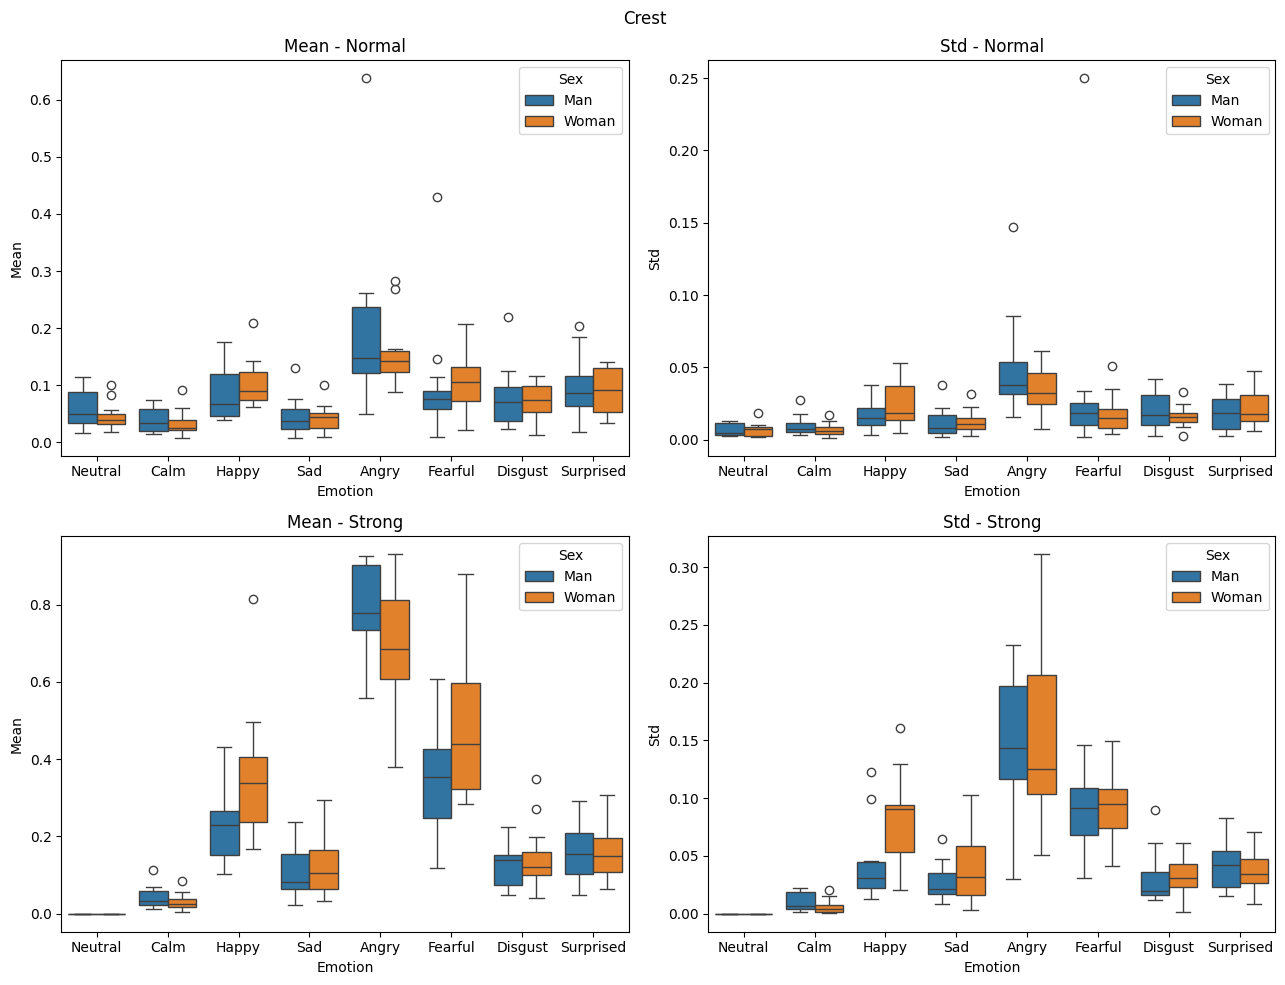

In [89]:
plot_mean_std('Crest')

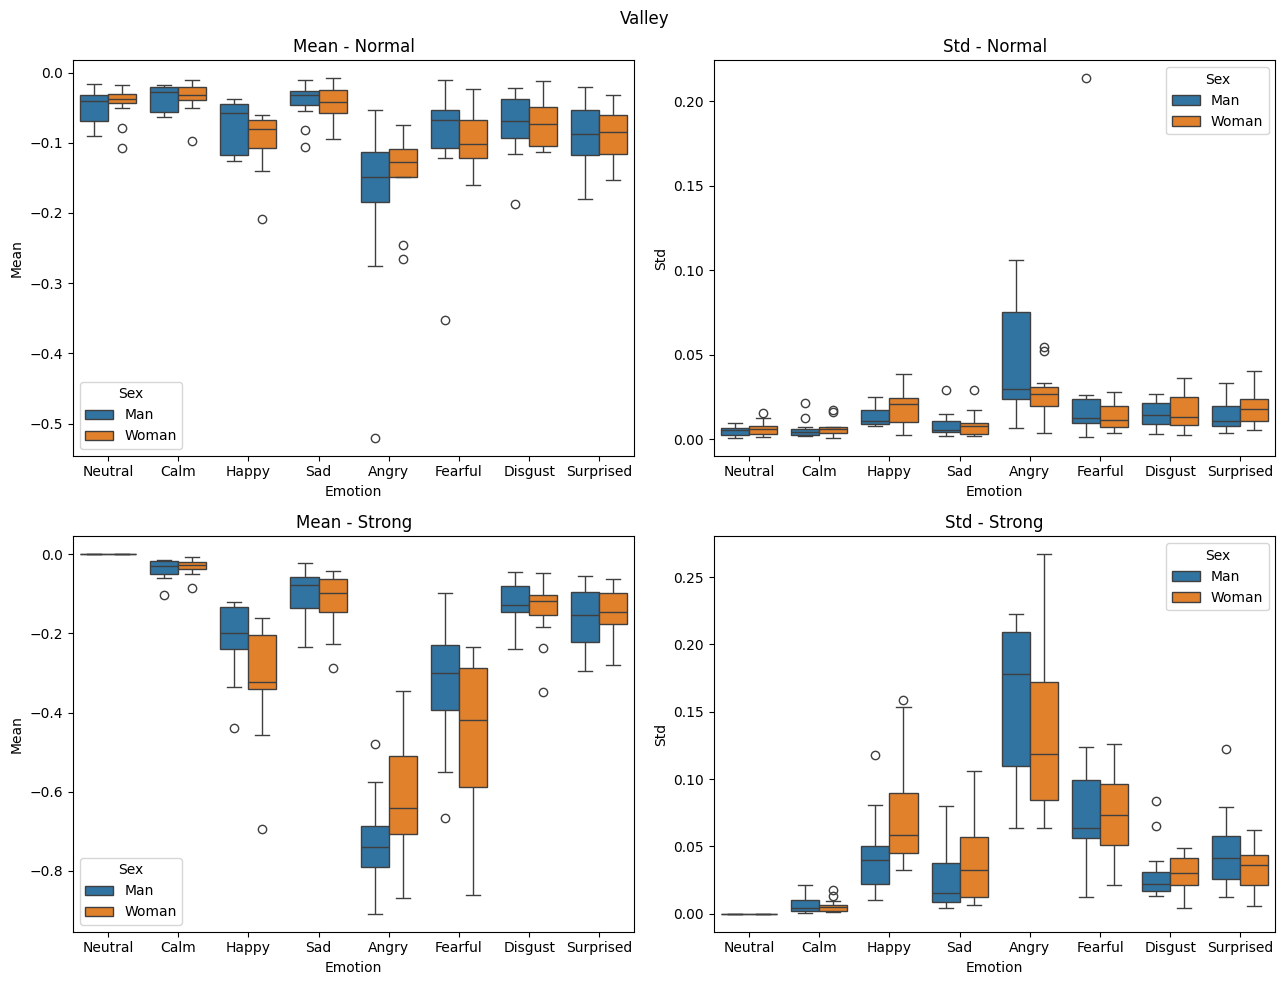

In [90]:
plot_mean_std('Valley')

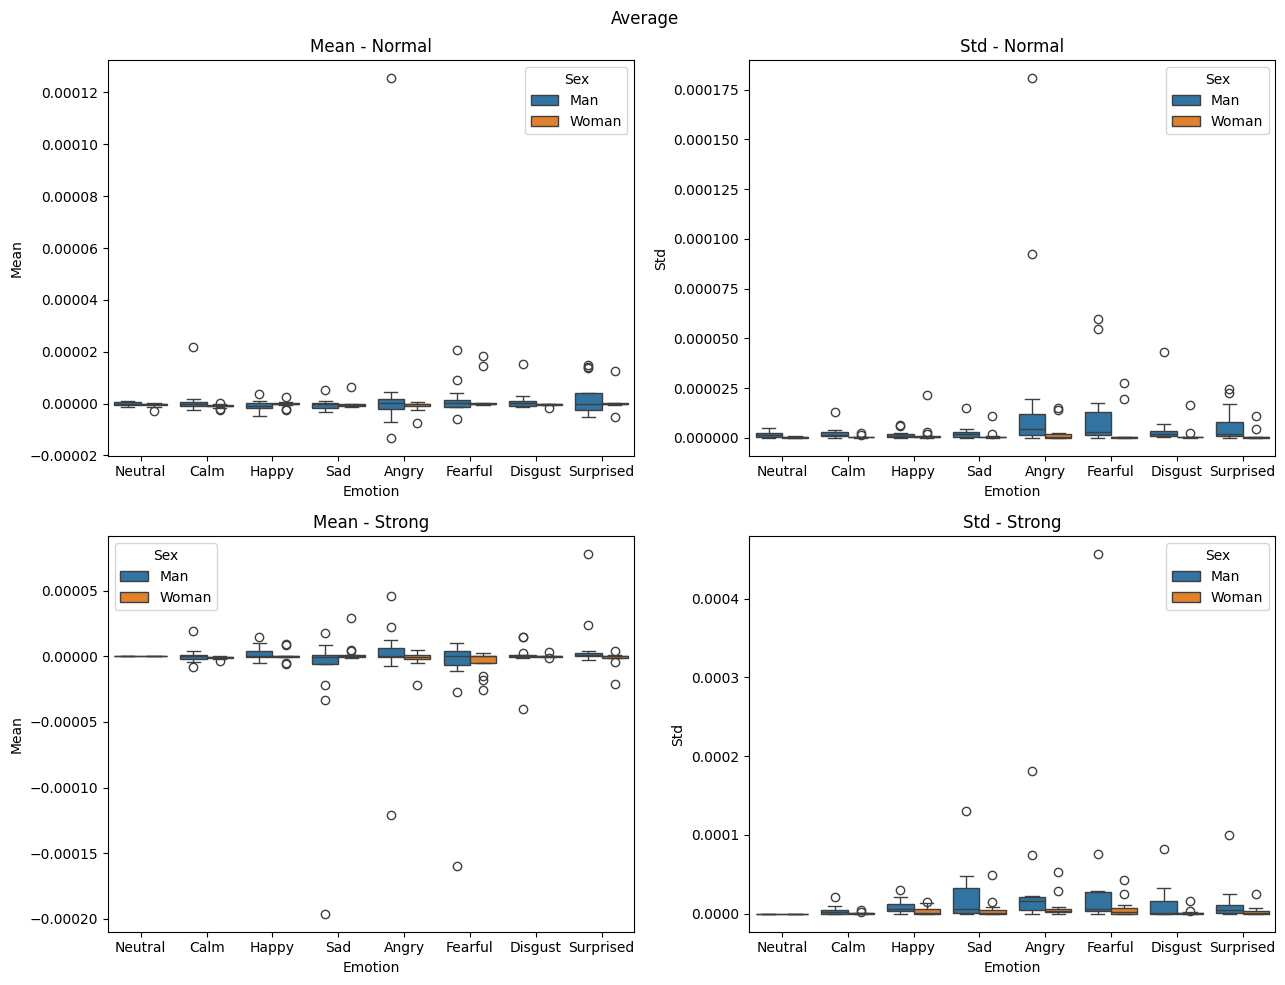

In [91]:
plot_mean_std('Average')

In [56]:
temp = actors_df[actors_df['Metric'] == 'Media']
temp = temp[temp['Sex'] == 'Man']

temp[temp['Mean'] == np.min(temp['Mean'])]

,Actor,Sex,Metric,Emotion,Mean,Std
355,Actor_15,Man,Media,Sad,-0.000095,0.000137


array([-4.3760614e-05, -6.3315281e-05, -4.3679996e-05, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

22050

-0.00035731852

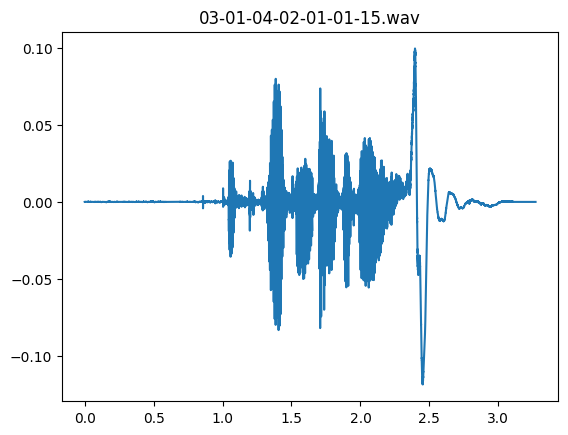

In [4]:
record = '03-01-04-02-01-01-15.wav'
y, sr = librosa.load(fr'Ravdess\audio_speech_actors_01-24\Actor_15\{record}')

display(y, sr, np.mean(y))

x = np.arange(0, len(y)/sr, 1/sr)

sns.lineplot(
	x=x, y=y
)
plt.title(record)
plt.show()

# display(np.max(y), np.min(y), np.mean(y))